# Lungs Cancer Detection using PyCaret

Dataset: [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer)

-> Let's see how effecient can <b>pycaret</b> makes it find <b>best model</b>

In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:
df = pd.read_csv('./survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
clf = setup(data=df, target='LUNG_CANCER', log_experiment=True, experiment_name='lung_cancer_exp_1')
best_model = compare_models()

,Description,Value
0,Session id,7245
1,Target,LUNG_CANCER
2,Target type,Binary
3,Target mapping,"NO: 0, YES: 1"
4,Original data shape,"(309, 16)"
5,Transformed data shape,"(309, 16)"
6,Transformed train set shape,"(216, 16)"
7,Transformed test set shape,"(93, 16)"
8,Ordinal features,1
9,Numeric features,14


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9126,0.8877,0.9737,0.9306,0.9510,0.4992,0.5223,0.0110
lr,Logistic Regression,0.9076,0.9395,0.9684,0.9294,0.9480,0.4862,0.5099,0.2590
lda,Linear Discriminant Analysis,0.9076,0.9376,0.9474,0.9476,0.9463,0.5531,0.5697,0.0060
ridge,Ridge Classifier,0.8983,0.0000,0.9737,0.9163,0.9434,0.3641,0.3858,0.0070
rf,Random Forest Classifier,0.8939,0.8916,0.9579,0.9239,0.9402,0.4410,0.4601,0.0220
catboost,CatBoost Classifier,0.8939,0.8767,0.9632,0.9193,0.9403,0.4010,0.4197,0.4120
qda,Quadratic Discriminant Analysis,0.8937,0.7928,0.9523,0.9282,0.9393,0.4908,0.5210,0.0070
nb,Naive Bayes,0.8935,0.8875,0.9526,0.9289,0.9395,0.4190,0.4376,0.0070
gbc,Gradient Boosting Classifier,0.8896,0.8356,0.9579,0.9191,0.9378,0.4052,0.4221,0.0110
et,Extra Trees Classifier,0.8894,0.8414,0.9474,0.9274,0.9365,0.4860,0.5107,0.0200


* rerunning the code multiple times fluctuating the model's ranking, but top 3 model are mostly staying above 3rd ranking  
* without only tuning Logistic Regression model is giving better result in terms of Learning curves.

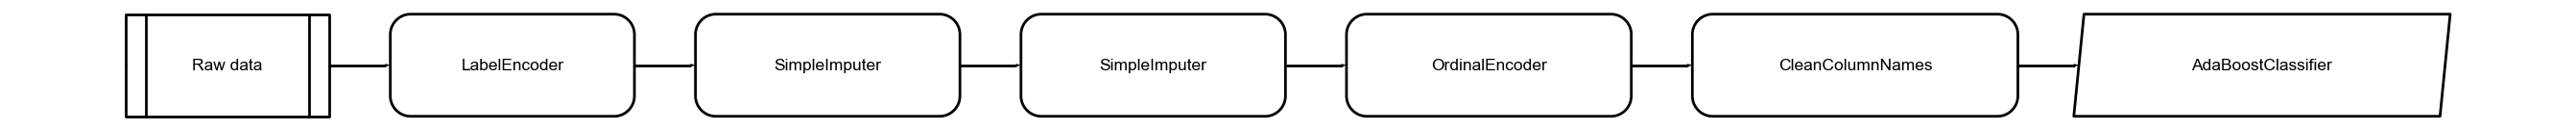

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [5]:
evaluate_model(best_model)

In [6]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9825,1.0000,0.9048,0.9500,0.4634,0.5492
1,0.9091,0.9386,0.9474,0.9474,0.9474,0.6140,0.6140
2,0.9091,0.9474,1.0000,0.9048,0.9500,0.4634,0.5492
3,0.9091,0.9474,0.9474,0.9474,0.9474,0.6140,0.6140
4,0.9091,0.8596,0.9474,0.9474,0.9474,0.6140,0.6140
5,0.8182,0.8070,0.9474,0.8571,0.9000,-0.0732,-0.0867
6,0.9048,0.9211,1.0000,0.9048,0.9500,0.0000,0.0000
7,0.9048,0.7895,0.9474,0.9474,0.9474,0.4474,0.4474
8,0.9524,0.9737,1.0000,0.9500,0.9744,0.6441,0.6892


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


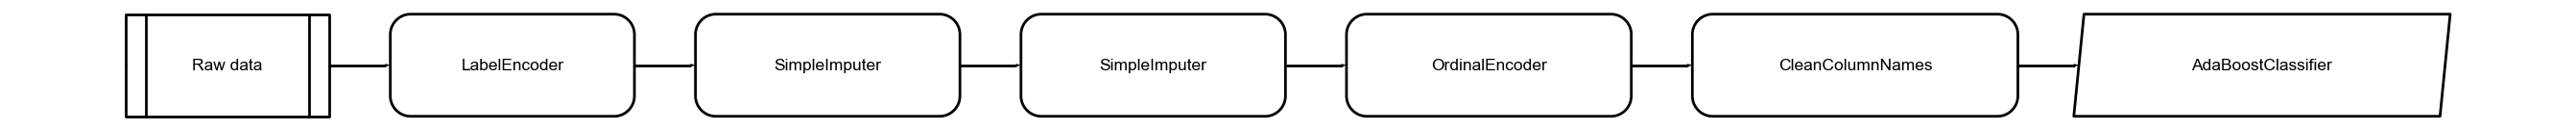

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
evaluate_model(tuned_best_model)

In [8]:
lgr = setup(data=df, target='LUNG_CANCER', log_experiment=True, experiment_name='lung_cancer_exp_2')
model_lr = create_model('lr')
tuned_lr = tune_model(model_lr)

,Description,Value
0,Session id,2263
1,Target,LUNG_CANCER
2,Target type,Binary
3,Target mapping,"NO: 0, YES: 1"
4,Original data shape,"(309, 16)"
5,Transformed data shape,"(309, 16)"
6,Transformed train set shape,"(216, 16)"
7,Transformed test set shape,"(93, 16)"
8,Ordinal features,1
9,Numeric features,14


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.9048,0.9500,0.4634,0.5492
1,0.8636,0.8421,1.0000,0.8636,0.9268,0.0000,0.0000
2,0.9091,1.0000,1.0000,0.9048,0.9500,0.4634,0.5492
3,0.9091,0.8772,0.9474,0.9474,0.9474,0.6140,0.6140
4,0.8182,0.8772,0.9474,0.8571,0.9000,-0.0732,-0.0867
5,0.9091,0.9474,1.0000,0.9048,0.9500,0.4634,0.5492
6,0.9524,0.9211,1.0000,0.9500,0.9744,0.6441,0.6892
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8095,0.8684,0.8947,0.8947,0.8947,-0.1053,-0.1053


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.8421,1.0000,0.9048,0.9500,0.4634,0.5492
2,0.9091,1.0000,1.0000,0.9048,0.9500,0.4634,0.5492
3,0.8636,0.8421,0.8947,0.9444,0.9189,0.4923,0.4995
4,0.8182,0.8772,0.9474,0.8571,0.9000,-0.0732,-0.0867
5,0.9545,0.9825,1.0000,0.9500,0.9744,0.7755,0.7958
6,0.9524,0.8947,1.0000,0.9500,0.9744,0.6441,0.6892
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,0.8158,0.8947,0.9444,0.9189,0.3226,0.3311


Fitting 10 folds for each of 10 candidates, totalling 100 fits


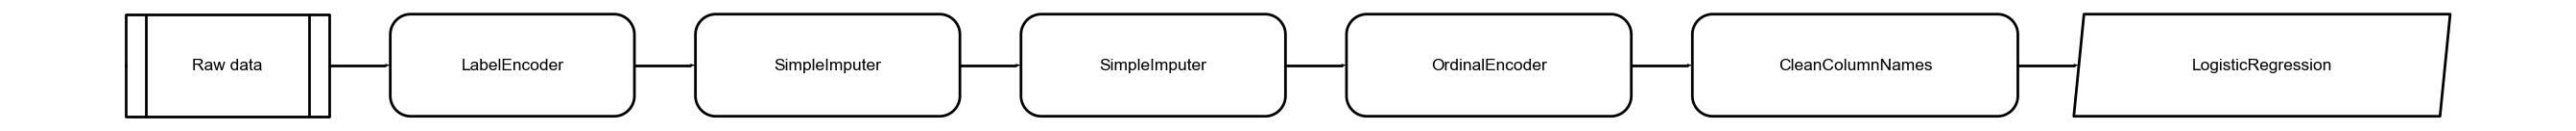

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
evaluate_model(model_lr)

In [10]:
tuned_lr = tune_model(model_lr, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.9825,0.8421,1.0000,0.9143,0.5926,0.6489
1,0.7273,0.8246,0.7895,0.8824,0.8333,0.0959,0.1006
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8182,0.8596,0.8421,0.9412,0.8889,0.3973,0.4166
4,0.7273,0.8421,0.7368,0.9333,0.8235,0.2584,0.2973
5,0.9545,1.0000,1.0000,0.9500,0.9744,0.7755,0.7958
6,0.8095,0.9211,0.8421,0.9412,0.8889,0.2364,0.2557
7,0.9524,1.0000,0.9474,1.0000,0.9730,0.7742,0.7947
8,0.8095,0.8947,0.7895,1.0000,0.8824,0.4167,0.5130


Fitting 10 folds for each of 10 candidates, totalling 100 fits


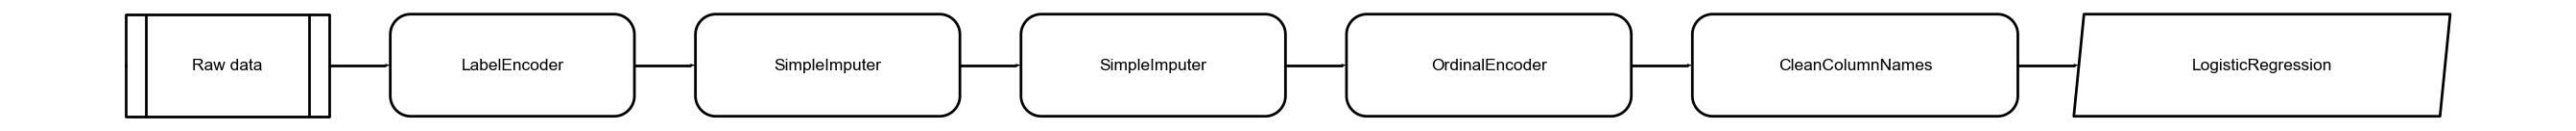

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
evaluate_model(tuned_lr)

In [12]:
tune_model(model_lr)
optuna_tuned = tune_model(model_lr, search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.8421,1.0000,0.9048,0.9500,0.4634,0.5492
2,0.9091,1.0000,1.0000,0.9048,0.9500,0.4634,0.5492
3,0.8636,0.8421,0.8947,0.9444,0.9189,0.4923,0.4995
4,0.8182,0.8772,0.9474,0.8571,0.9000,-0.0732,-0.0867
5,0.9545,0.9825,1.0000,0.9500,0.9744,0.7755,0.7958
6,0.9524,0.8947,1.0000,0.9500,0.9744,0.6441,0.6892
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,0.8158,0.8947,0.9444,0.9189,0.3226,0.3311


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,1.0000,1.0000,0.9500,0.9744,0.7755,0.7958
1,0.9091,0.8421,1.0000,0.9048,0.9500,0.4634,0.5492
2,0.9091,1.0000,1.0000,0.9048,0.9500,0.4634,0.5492
3,0.9091,0.8596,0.9474,0.9474,0.9474,0.6140,0.6140
4,0.8182,0.8772,0.9474,0.8571,0.9000,-0.0732,-0.0867
5,0.9545,0.9649,1.0000,0.9500,0.9744,0.7755,0.7958
6,0.9524,0.8947,1.0000,0.9500,0.9744,0.6441,0.6892
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,0.8684,0.8947,0.9444,0.9189,0.3226,0.3311


[I 2024-04-30 11:35:01,084] Searching the best hyperparameters using 216 samples...
[I 2024-04-30 11:35:04,772] Finished hyperparemeter search!


In [13]:
sko_tuned = tune_model(model_lr, search_library='scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.8246,1.0000,0.9048,0.9500,0.4634,0.5492
2,0.9091,1.0000,1.0000,0.9048,0.9500,0.4634,0.5492
3,0.8636,0.8246,0.8947,0.9444,0.9189,0.4923,0.4995
4,0.8182,0.8596,0.9474,0.8571,0.9000,-0.0732,-0.0867
5,0.9545,0.9825,1.0000,0.9500,0.9744,0.7755,0.7958
6,0.9524,0.8947,1.0000,0.9500,0.9744,0.6441,0.6892
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,0.8158,0.8947,0.9444,0.9189,0.3226,0.3311


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [14]:
tsk_tuned = tune_model(model_lr, search_library='tune-sklearn', search_algorithm='hyperopt')

2024-04-30 11:35:21,675	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to '/Users/achbj/ray_results/_Trainable_2024-04-30_11-35-11' in 0.0394s.
2024-04-30 11:35:23,813	INFO tune.py:1048 -- Total run time: 12.80 seconds (6.69 seconds for the tuning loop).


In [15]:
boosted_lr = ensemble_model(model_lr, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,1.0000,1.0000,0.8636,0.9268,0.0000,0.0000
1,0.8636,0.8246,1.0000,0.8636,0.9268,0.0000,0.0000
2,0.8636,1.0000,1.0000,0.8636,0.9268,0.0000,0.0000
3,0.8636,0.8947,1.0000,0.8636,0.9268,0.0000,0.0000
4,0.8636,0.8947,1.0000,0.8636,0.9268,0.0000,0.0000
5,0.8636,0.9298,1.0000,0.8636,0.9268,0.0000,0.0000
6,0.9048,0.9211,1.0000,0.9048,0.9500,0.0000,0.0000
7,0.9048,1.0000,1.0000,0.9048,0.9500,0.0000,0.0000
8,0.9048,0.8947,0.9474,0.9474,0.9474,0.4474,0.4474


In [16]:
create_app(best_model)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
